In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
x = df.drop(['Email No.', 'Prediction'], axis = 1)
y = df['Prediction']

In [5]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_tests, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_tests)

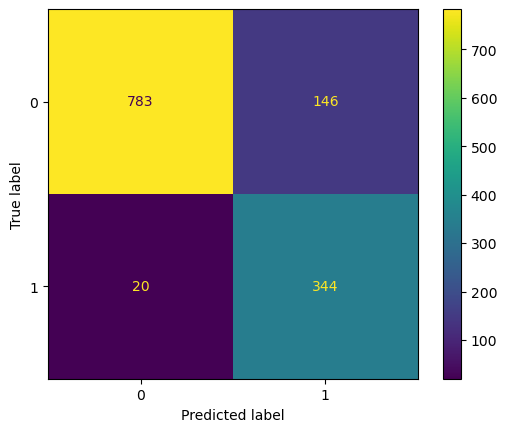

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [10]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [11]:
import numpy as np
errors = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_tests)
    errors.append(np.mean(pred != y_test))

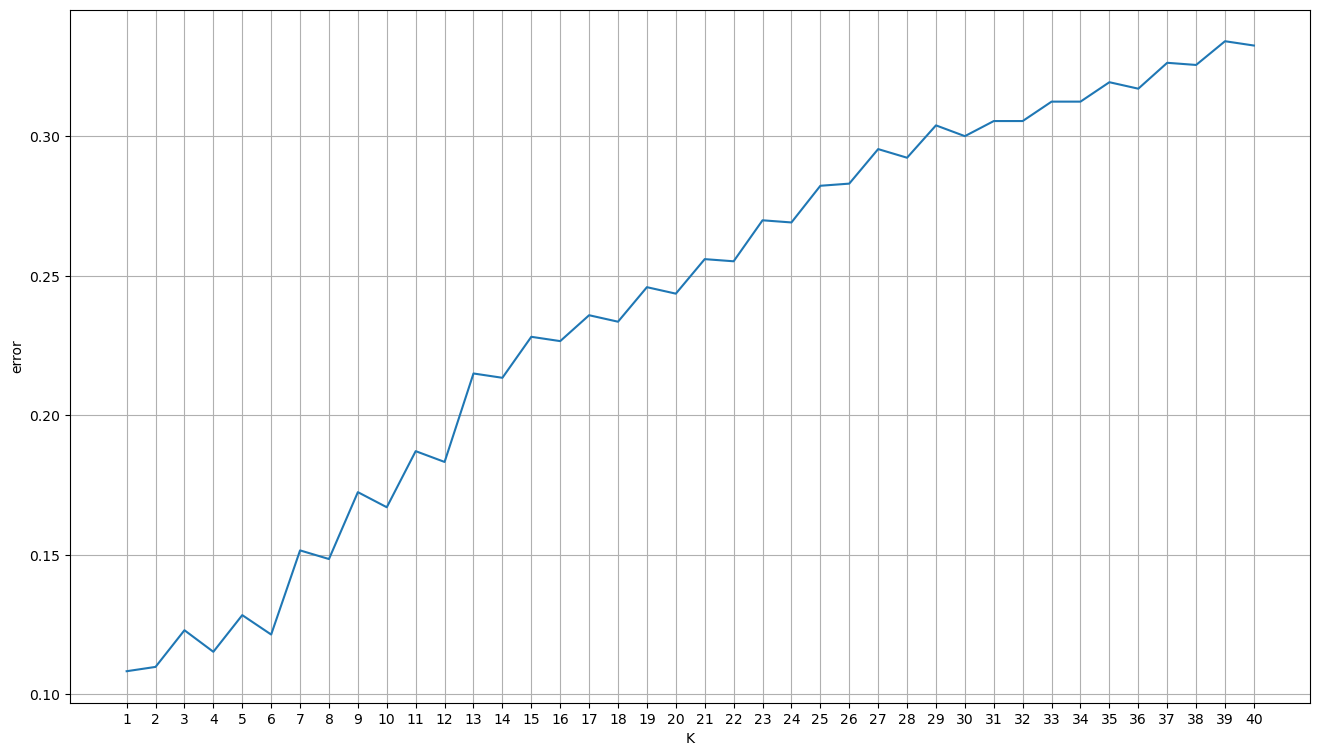

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.xlabel("K")
plt.ylabel("error")
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), errors)

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_tests)

In [14]:
accuracy_score(y_test, y_pred)

0.8917246713070379

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf")
svm.fit(x_train, y_train)
y_pred = svm.predict(x_tests)
accuracy_score(y_test, y_pred)


0.9450889404485692